# Exploracion, Transformacion y Limpieza de los Datos

Importación de las librerias necesarias

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import datetime
from deep_translator import GoogleTranslator

Apertura de Datos

In [60]:
data = pd.read_csv('accidentesaviones.csv')

#Configuro para que se puedan visualizar todas las columnas
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format


La primera columna es una idenfificación única por lo que la renombro y mantengo como index.

In [61]:
data.rename(columns={'Unnamed: 0':'id'}, inplace=True)
data.set_index('id', inplace=True)

Visualizo como se componen las columnas

In [62]:
data.head()

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
id,,,,,,,,,,,,,,,,,
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [63]:
data.shape

(5008, 17)

Borro el caracter esppecial '?'

In [64]:
data = data.replace(['?'], [''])

Cambio el formato de fecha

In [65]:
data['fecha'] = pd.to_datetime(data['fecha'])

Normalizo nombres de las columnas

In [67]:
data=data.rename(columns={'HORA declarada':'hora',
                          'Ruta':'ruta',
                          'OperadOR':'operador',
                          'flight_no':'nro_vuelo',
                          'ac_type':'tipo_aeronave',
                          'registration':'registro',
                          'all_aboard':'total_a_bordo',
                          'PASAJEROS A BORDO':'pasajeros_a_bordo', 
                          'cantidad de fallecidos': 'cantidad_de_fallecidos',
                          'passenger_fatalities':'pasajeros_fallecidos',
                          'crew_aboard':'tripulacion',
                          'crew_fatalities':'tripulacion_fallecida',
                          'ground':'fallecidos_en_tierra',
                          'summary':'resumen'})

In [68]:
print(data.dtypes)

fecha                     datetime64[ns]
hora                              object
ruta                              object
operador                          object
nro_vuelo                         object
route                             object
tipo_aeronave                     object
registro                          object
cn_ln                             object
total_a_bordo                     object
pasajeros_a_bordo                 object
tripulacion                       object
cantidad_de_fallecidos            object
pasajeros_fallecidos              object
tripulacion_fallecida             object
fallecidos_en_tierra              object
resumen                           object
dtype: object


Normalizo la columna Hora, quitandole caracteres adicionales y formateandola correctamente

In [69]:
def norm_hora(valor):
    valor=valor.replace('c','') 
    valor=valor.replace('Z','')
    valor=valor.replace('c:','')
    valor=valor.replace(' ','')
    valor=valor.replace(':','')
    valor=valor.replace(';','')
    
    if ':' not in valor:
        return valor
    elif valor[0] == ':':
        return f'00{valor}'
    elif valor[-1] == ':':
        return f'{valor}00'
    elif len(valor) == 4:
        return '0' + valor
    else:
        return valor
    
data['hora']=data['hora'].apply(lambda x:norm_hora(x))
data['hora']

id
0       1718
1           
2       0630
3           
4       1830
        ... 
5003    1835
5004    1800
5005    0800
5006    1130
5007    1500
Name: hora, Length: 5008, dtype: object

In [70]:
#reemplazo los valores inexistentes por valor 00:00,

data.hora.replace([''],'0000', inplace=True)

Formateo con datetime la columna hora

In [71]:
data.hora=pd.to_datetime(data.hora, format='%H%M').dt.time

In [72]:
data.head()


,fecha,hora,ruta,operador,nro_vuelo,route,tipo_aeronave,registro,cn_ln,total_a_bordo,pasajeros_a_bordo,tripulacion,cantidad_de_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,fallecidos_en_tierra,resumen
id,,,,,,,,,,,,,,,,,
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,00:00:00,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,SC1,,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,,,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,00:00:00,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,,,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),,,20,,,14,,,0,The airship flew into a thunderstorm and encou...


Normalizacion de tipo de datos de las columnas

In [73]:
data.replace([''],'NaN', inplace=True)

In [74]:
data.total_a_bordo=data.total_a_bordo.astype(float)

In [75]:
data.pasajeros_a_bordo=data.pasajeros_a_bordo.astype(float)

In [76]:
data.tripulacion=data.tripulacion.astype(float)

In [77]:
data.cantidad_de_fallecidos=data.cantidad_de_fallecidos.astype(float)

In [78]:
data.pasajeros_fallecidos=data.pasajeros_fallecidos.astype(float)

In [79]:
data.tripulacion_fallecida=data.tripulacion_fallecida.astype(float)

In [80]:
data.fallecidos_en_tierra=data.fallecidos_en_tierra.astype(float)

In [81]:
print(data.dtypes)

fecha                     datetime64[ns]
hora                              object
ruta                              object
operador                          object
nro_vuelo                         object
route                             object
tipo_aeronave                     object
registro                          object
cn_ln                             object
total_a_bordo                    float64
pasajeros_a_bordo                float64
tripulacion                      float64
cantidad_de_fallecidos           float64
pasajeros_fallecidos             float64
tripulacion_fallecida            float64
fallecidos_en_tierra             float64
resumen                           object
dtype: object


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   hora                    5008 non-null   object        
 2   ruta                    5008 non-null   object        
 3   operador                5008 non-null   object        
 4   nro_vuelo               5008 non-null   object        
 5   route                   5008 non-null   object        
 6   tipo_aeronave           5008 non-null   object        
 7   registro                5008 non-null   object        
 8   cn_ln                   5008 non-null   object        
 9   total_a_bordo           4991 non-null   float64       
 10  pasajeros_a_bordo       4787 non-null   float64       
 11  tripulacion             4789 non-null   float64       
 12  cantidad_de_fallecidos  5000 non-null   float64 

In [243]:
data.head(2)



,unnamed: 0,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.00,1.00,1.00,1.00,1.00,0.00,0.00,"During a demonstration flight, a U.S. Army fly..."
1,1,1909-09-07,00:00:00,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.00,0.00,1.00,1.00,0.00,0.00,0.00,Eugene Lefebvre was the first pilot to ever be...


Traduzco la columna resumen

In [89]:
traductor = GoogleTranslator(source='en', target='es')
data['informe'] = data['resumen'].apply(lambda x: traductor.translate(x))


In [90]:
data.head()


,fecha,hora,ruta,operador,nro_vuelo,route,tipo_aeronave,registro,cn_ln,total_a_bordo,pasajeros_a_bordo,tripulacion,cantidad_de_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,fallecidos_en_tierra,resumen,informe
id,,,,,,,,,,,,,,,,,,
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.00,1.00,1.00,1.00,1.00,0.00,0.00,"During a demonstration flight, a U.S. Army fly...","Durante un vuelo de demostración, un avión del..."
1,1909-09-07,00:00:00,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.00,0.00,1.00,1.00,0.00,0.00,0.00,Eugene Lefebvre was the first pilot to ever be...,Eugene Lefebvre fue el primer piloto en morir ...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.00,0.00,5.00,5.00,0.00,5.00,0.00,First U.S. dirigible Akron exploded just offsh...,El primer dirigible estadounidense Akron explo...
3,1913-08-06,00:00:00,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.00,0.00,1.00,1.00,0.00,1.00,0.00,The first fatal airplane accident in Canada oc...,El primer accidente de avión mortal en Canadá ...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.00,NaN,NaN,14.00,NaN,NaN,0.00,The airship flew into a thunderstorm and encou...,La aeronave voló hacia una tormenta eléctrica ...


Descripcion de datos

In [84]:
data.duplicated().sum()

0

In [ ]:
data.describe(exclude=[object])

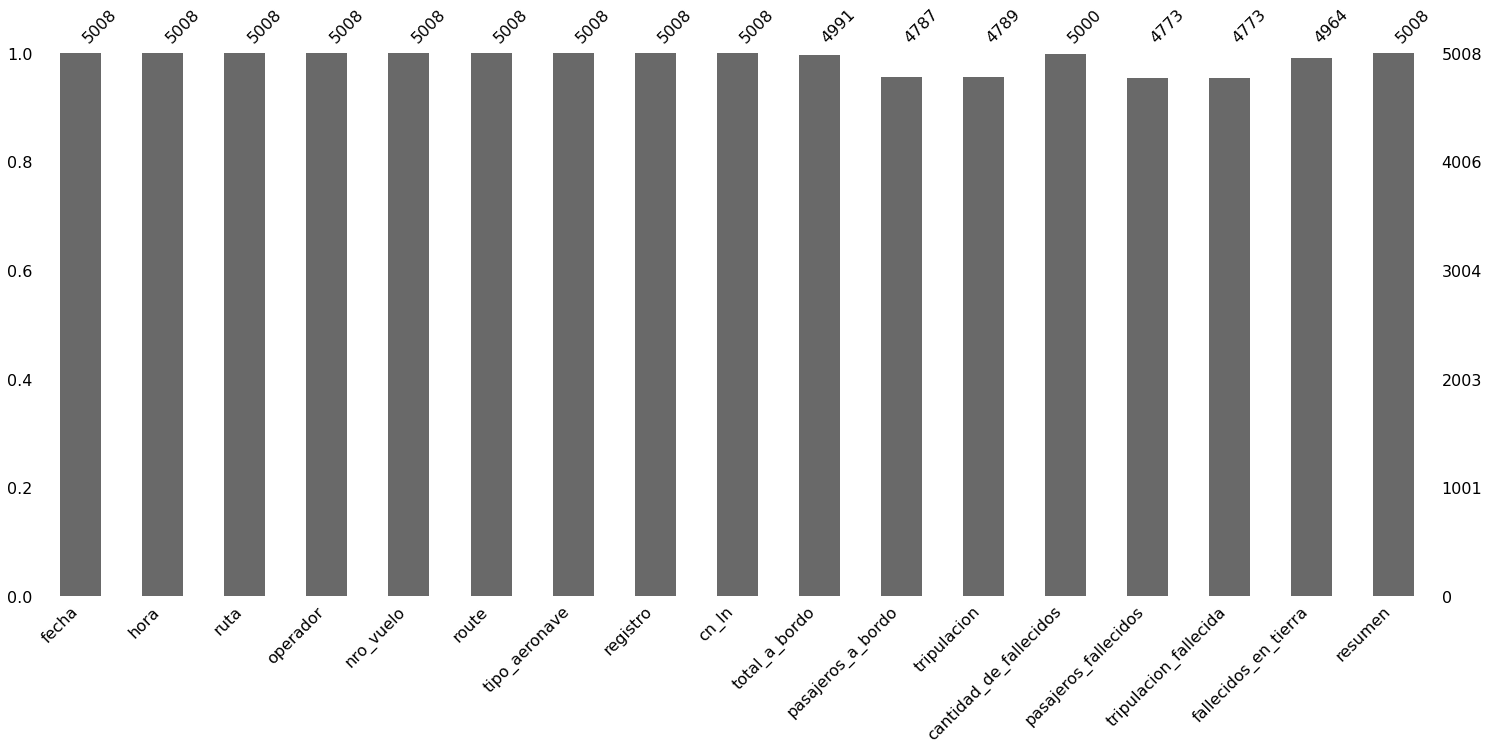

In [88]:
msno.bar(data)
plt.show()

En vez de Dropear las columnas que no usare, genero un nuevo dataset con las columnas utiles.

In [112]:
accidentes = data [['fecha','hora','ruta','operador','nro_vuelo',
                          'tipo_aeronave','registro','cn_ln',
                          'total_a_bordo',
                          'cantidad_de_fallecidos',
                          'fallecidos_en_tierra']]

In [113]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   hora                    5008 non-null   object        
 2   ruta                    5008 non-null   object        
 3   operador                5008 non-null   object        
 4   nro_vuelo               5008 non-null   object        
 5   tipo_aeronave           5008 non-null   object        
 6   registro                5008 non-null   object        
 7   cn_ln                   5008 non-null   object        
 8   total_a_bordo           4991 non-null   float64       
 9   cantidad_de_fallecidos  5000 non-null   float64       
 10  fallecidos_en_tierra    4964 non-null   float64       
 11  informe                 5008 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(8)
memo

In [97]:
operador=accidentes['operador'].value_counts()
operador

Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: operador, Length: 2268, dtype: int64

In [109]:
accidentes.hora.replace(['0'],'', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6928\275201219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes.hora.replace(['0'],'', inplace=True)


In [110]:
hora=accidentes['hora'].value_counts()
hora

00:00:00    1506
15:00:00      38
17:00:00      34
14:00:00      33
11:00:00      32
            ... 
14:24:00       1
06:06:00       1
02:42:00       1
21:16:00       1
19:14:00       1
Name: hora, Length: 1060, dtype: int64

Analizo, TopTen Horarios de accidentes

In [101]:
hora=accidentes['hora'].value_counts()
hora
print(hora[hora==1].count())
print(hora[hora==2].count())
print(hora[hora==3].count())
print(hora[hora==4].count())
print(hora[hora==5].count())
print(hora[hora==6].count())
print(hora[hora==7].count())
print(hora[hora==8].count())
print(hora[hora==9].count())
print(hora[hora==10].count())

437
236
128
72
37
30
27
13
12
9


Guardo el dataset como .csv

In [117]:
accidentes.to_csv('accidentes.csv', sep=',')